/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


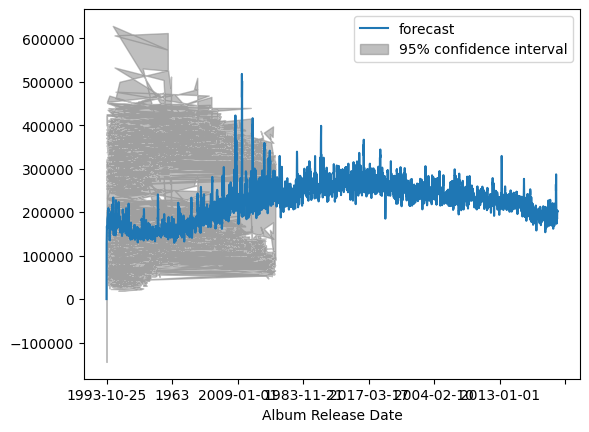

In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict

def create_time_series_model_from_file(file_path, date_column, data_column, order=(5, 1, 0)):
  """
  Creates a time series model from a CSV file using ARIMA.

  Args:
    file_path: The path to the CSV file.
    date_column: The name of the column containing the date or time information.
    data_column: The name of the column containing the time series data.
    order: A tuple (p, d, q) specifying the order of the ARIMA model.

  Returns:
    An ARIMA model fitted to the data.
  """
  # Read the CSV file into a Pandas DataFrame
  df = pd.read_csv(file_path, parse_dates=[date_column], index_col=date_column)

  # Drop rows with any NA values in the specified data column
  df.dropna(subset=[data_column], inplace=True)


  # Fit the ARIMA model to the data
  model = ARIMA(df[data_column], order=order)
  model_fit = model.fit()
  return model_fit

# Example usage:
model = create_time_series_model_from_file('Billboard_Hot100_Songs_Spotify_1946-2022.csv', 'Album Release Date', 'Song Length(ms)', order=(5, 1, 0))


# Assuming 'model' is your fitted ARIMA model
# Use the imported plot_predict function instead of the method on the model object
fig, ax = plt.subplots()
plot_predict(model, dynamic=False, ax=ax)
plt.show()

Using the a Time Series, we can notice trends in the data. Here I used it on the length of a song in miliseconds over time. One thing that we can get from the data immediatity is the structure of the data. The grey area lets us know the level of variability in the data. Here we notice that the model is less confident on songs before 1983. This could because of missing metadata that wasn't adapted until later. Considering this is spotify data, we can use this to narraw the scope of our project. Focusing more on data after the 80s and lets us know we need to do some cleaning.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


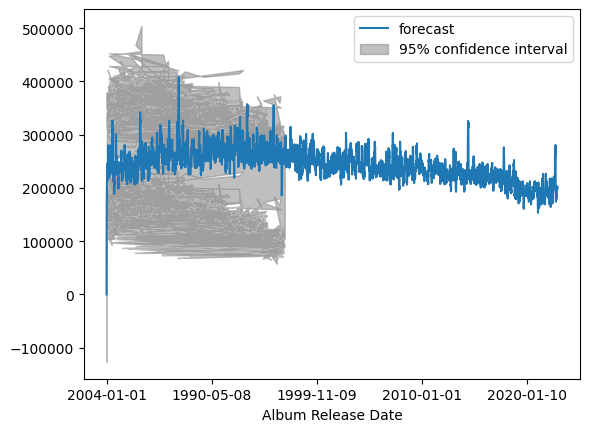

In [4]:
def create_time_series_model_from_file(file_path, date_column, data_column, order=(5, 1, 0)):
  """
  Creates a time series model from a CSV file using ARIMA.

  Args:
    file_path: The path to the CSV file.
    date_column: The name of the column containing the date or time information.
    data_column: The name of the column containing the time series data.
    order: A tuple (p, d, q) specifying the order of the ARIMA model.

  Returns:
    An ARIMA model fitted to the data.
  """
  # Read the CSV file into a Pandas DataFrame
  df = pd.read_csv(file_path, parse_dates=[date_column], index_col=date_column)

  # Drop rows with any NA values in the specified data column
  df.dropna(subset=[data_column], inplace=True)

  df = df[df["Hot100 Ranking Year"] >= 1980]


  # Fit the ARIMA model to the data
  model = ARIMA(df[data_column], order=order)
  model_fit = model.fit()
  return model_fit

# Example usage:
model = create_time_series_model_from_file('Billboard_Hot100_Songs_Spotify_1946-2022.csv', 'Album Release Date', 'Song Length(ms)', order=(5, 1, 0))


# Assuming 'model' is your fitted ARIMA model
# Use the imported plot_predict function instead of the method on the model object
fig, ax = plt.subplots()
plot_predict(model, dynamic=False, ax=ax)
plt.show()

Now that we've narrowed the scope once again, we can see a better picture of how varibile the data is. We also notice that the some of the rows is either foramtted incorrectly causing a non-linear dataset.
This will requore further cleaning and/or narrowing.

With Time Series we will be able to use to understand the structure of our data and make adjustments acoordingly before moving onto the next step.
